# Monte Carlo example

In [1]:
# Add pytwoway to system path, do not run this
# import sys
# sys.path.append('../../..')

In [2]:
# Import the pytwoway package 
# (Make sure you have installed it using pip install pytwoway)
import pytwoway as tw

## First, optionally set parameter values for the simulated data

In [3]:
## Optional Parameters ##
sim_params = {
    'num_ind': 10000, # Number of workers
    'num_time': 5, # Time length of panel
    'firm_size': 50, # Max number of individuals per firm
    'nk': 10, # Number of firm types
    'nl': 5, # Number of worker types
    'alpha_sig': 1, # Standard error of individual fixed effect (volatility of worker effects)
    'psi_sig': 1, # Standard error of firm fixed effect (volatility of firm effects)
    'w_sig': 5, # Standard error of residual in AKM wage equation (volatility of wage shocks)
    'csort': 1, # Sorting effect
    'cnetw': 1, # Network effect
    'csig': 1, # Standard error of sorting/network effects
    'p_move': 0.5 # Probability a worker moves firms in any period
}

## Second, create a simulated Monte Carlo object using the parameter choices

In [4]:
# Create the TwoWayMonteCarlo object
twmc_net = tw.TwoWayMonteCarlo(sim_params)

## Third, optionally set parameter values for the Monte Carlo simulation

In [5]:
## Optional Parameters ##
# For FE estimation
fe_params = {
    'ncore': 1, # Number of cores to use
    'batch': 1, # Batch size to send in parallel
    'ndraw_pii': 50, # Number of draw to use in approximation for leverages
    'ndraw_tr': 5, # Number of draws to use in approximation for traces
    'check': False, # Whether to compute the non-approximated estimates as well
    'hetero': False, # Whether to compute the heteroskedastic estimates
    'out': 'res_fe.json', # Filepath for fe results
    'con': False, # Computes the smallest eigen values, this is the filepath where these results are saved
    'logfile': '', # Log output to a logfile
    'levfile': '', # File to load precomputed leverages
    'statsonly': False # Save data statistics only
}
# For CRE estimation
cre_params = {
    'ncore': 1, # Number of cores to use
    'ndraw_tr': 5, # Number of draws to use in approximation for traces
    'ndp': 50, # Number of draw to use in approximation for leverages
    'out': 'res_cre.json', # Filepath for cre results
    'posterior': False, # Whether to compute the posterior variance
    'wobtw': False # Sets between variation to 0, pure RE when computing cre
}
# For clustering (specifically for the KMeans algorithm)
KMeans_params = { # These parameters are specifically for the KMeans algorithm
                  # Read more at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    'n_clusters': 10,
    'init': 'k-means++',
    'n_init': 500,
    'max_iter': 300,
    'tol': 0.0001,
    'precompute_distances': 'deprecated',
    'verbose': 0,
    'random_state': None,
    'copy_x': True,
    'n_jobs': 'deprecated',
    'algorithm': 'auto'
}
# For clustering
cluster_params = {
    'cdf_resolution': 10, # How many values to use to approximate the cdf when clustering
    'grouping': 'quantile_all',
        # How to group the cdfs when clustering
        # ('quantile_all' to get quantiles from entire set of data,
        #     then have firm-level values between 0 and 1;
        # 'quantile_firm_small' to get quantiles at the firm-level
        #     and have values be compensations if small data;
        # 'quantile_firm_large' to get quantiles at the firm-level
        #     and have values be compensations if large data,
        #     note that this is up to 50 times slower than 'quantile_firm_small'
        #     and should only be used if the dataset is too large to copy
        #     into a dictionary)
    'year': None, # If None, uses entire dataset when clustering;
                  # If int, gives year of data to consider when clustering
    'user_KMeans': KMeans_params
}

## Fourth, run the Monte Carlo simulation using the parameter choices

In [ ]:
twmc_net.twfe_monte_carlo(N=500, ncore=4, fe_params=fe_params, cre_params=cre_params, cluster_params=cluster_params)

## Fifth and finally, plot parameter estimates (plots show the difference from the truth)

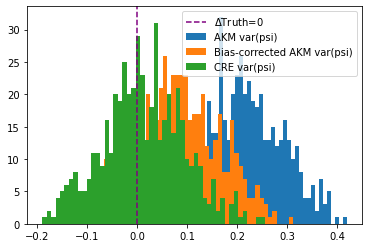

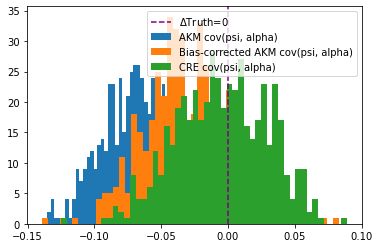

In [7]:
twmc_net.plot_monte_carlo()